In [1]:
#importing all required libraries and functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as pp
import seaborn as sb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from sklearn.metrics import classification_report,confusion_matrix
from xgboost import XGBClassifier as xgbc

In [2]:
#Importing the data as a pandas dataframe and displaying for visual check
data = pd.read_excel('Credit_default.xls',header=1)
dat_org = pd.DataFrame(data)
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


[Text(0.5, 1.0, 'Checking class balance')]

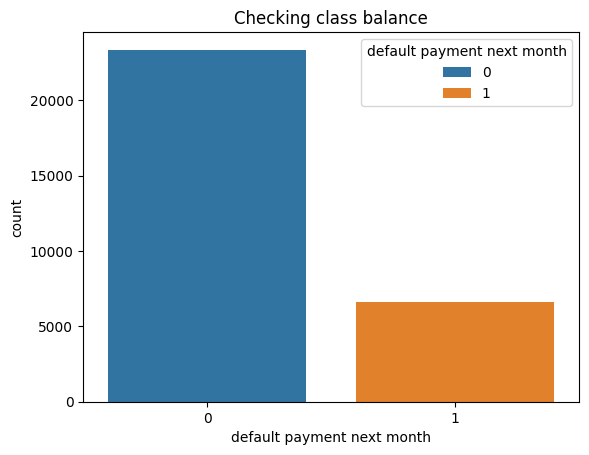

In [3]:
#Checking for class imbalance using the countplot
sb.countplot(data=data , x='default payment next month', hue='default payment next month').set(title="Checking class balance")

In [4]:
#The descriptive statistics of the data for visual inspection
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [5]:
print("Checking for null values")
data.isnull().count()

Checking for null values


ID                            30000
LIMIT_BAL                     30000
SEX                           30000
EDUCATION                     30000
MARRIAGE                      30000
AGE                           30000
PAY_0                         30000
PAY_2                         30000
PAY_3                         30000
PAY_4                         30000
PAY_5                         30000
PAY_6                         30000
BILL_AMT1                     30000
BILL_AMT2                     30000
BILL_AMT3                     30000
BILL_AMT4                     30000
BILL_AMT5                     30000
BILL_AMT6                     30000
PAY_AMT1                      30000
PAY_AMT2                      30000
PAY_AMT3                      30000
PAY_AMT4                      30000
PAY_AMT5                      30000
PAY_AMT6                      30000
default payment next month    30000
dtype: int64

C:\Users\Shreyas\AppData\Local\Temp\ipykernel_15252\4264830807.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  pp.legend(bbox_to_anchor=(1, 1), loc=2)


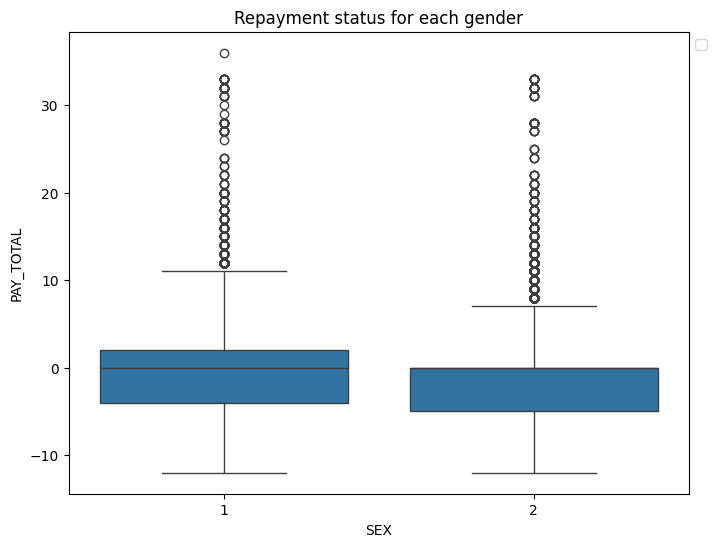

In [6]:
data['PAY_TOTAL'] = (data.PAY_0 + data.PAY_2 + data.PAY_3 + data.PAY_4 + data.PAY_5 + data.PAY_6) #Creating a PAY_TOTAL new variable
pp.figure(figsize=(8,6))
sb.boxplot(x='SEX', y = 'PAY_TOTAL',data=data).set_title("Repayment status for each gender") #Checking PAY_TOTAL for each gender for drawing inferences
pp.legend(bbox_to_anchor=(1, 1), loc=2)

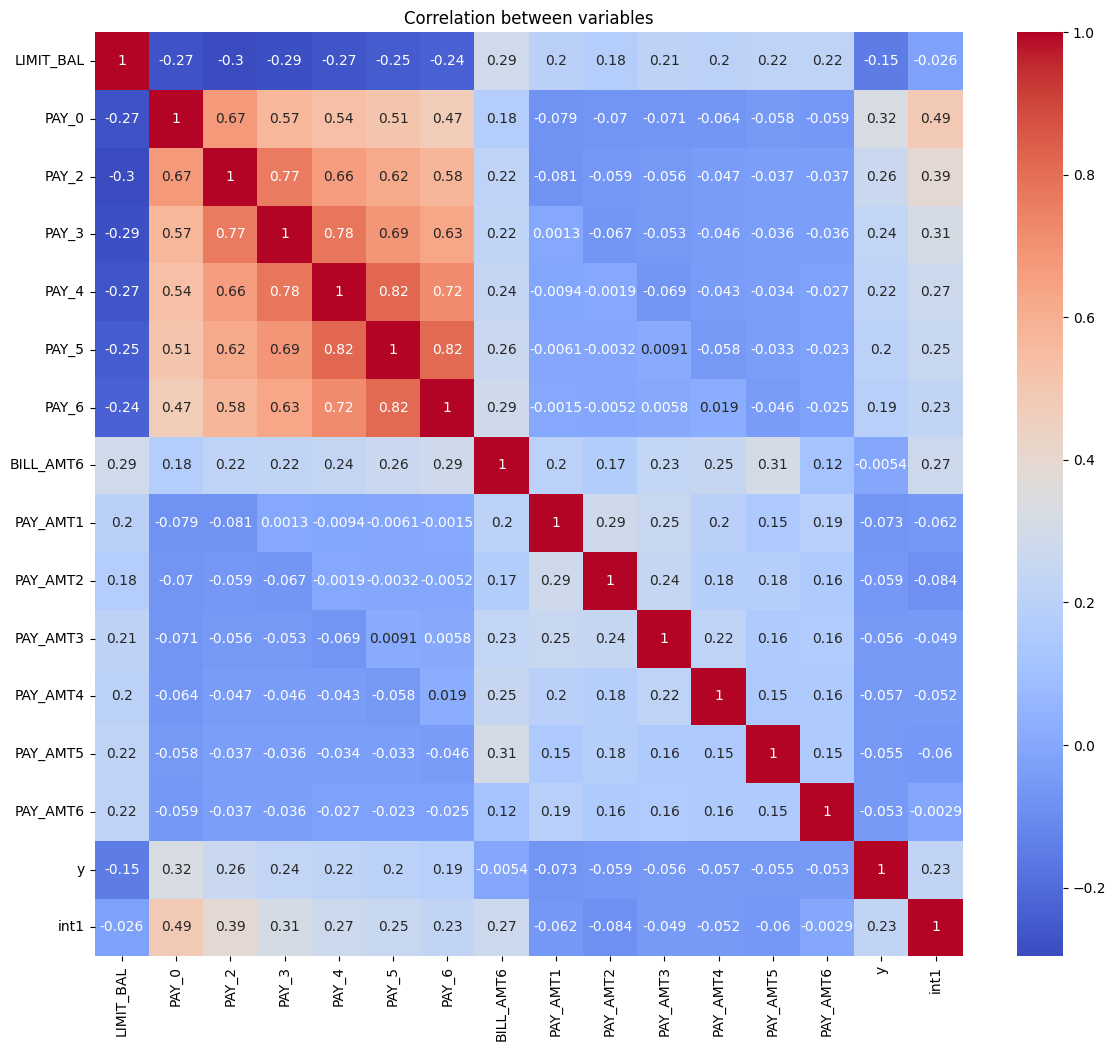

In [19]:
#Measuring correlation between independent variables to test for multicollinearity
corr_mat = data.corr()
cols = data.columns
n = len(cols)
c = 0
cor = list()
for a,i in corr_mat.iterrows():
    for j in range(c,n,1): #Inner loop from c instead of 0 to avoid both (a,b) and (b,a) combinations showing up from matrix
        if a == cols[j]: #Since correlation of variable with itself will always be 1
            continue
        if(i[cols[j]] > 0.3): #Filtering out the combinations will low correlation for later visual insepction through a table 
            cor.append([a,cols[j],i[cols[j]]])
    c = c + 1
cor = pd.DataFrame(data=cor,columns=["Variable-1","Variable-2","Correlation"])
pp.figure(figsize=(14,12))
sb.heatmap(corr_mat,annot=True,cmap='coolwarm') #Heatmap makes it easier to single out high or low correlations
pp.title("Correlation between variables")
pp.show()

In [8]:
cor #Visual inspection of earlier selected combinations

,Variable-1,Variable-2,Correlation
0,PAY_0,PAY_2,0.672164
1,PAY_0,PAY_3,0.574245
2,PAY_0,PAY_4,0.538841
3,PAY_0,PAY_5,0.509426
4,PAY_0,PAY_6,0.474553
5,PAY_0,default payment next month,0.324794
6,PAY_0,PAY_TOTAL,0.741345
7,PAY_2,PAY_3,0.766552
8,PAY_2,PAY_4,0.662067
9,PAY_2,PAY_5,0.622780


In [9]:
data['y'] = data['default payment next month'] #Renaming the depdendent var to make it easier to reference
data = data.drop(columns=['ID','AGE','MARRIAGE','EDUCATION','SEX','BILL_AMT1','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT2','PAY_TOTAL']) #Dropping unimportant variables
data = data.drop(columns=['default payment next month'])
data['int1'] = data['PAY_0']*data['BILL_AMT6'] #Creating an interaction variable

X = data.drop(columns=['y'])
y = data['y'].astype(int)
X.columns #For visual inspection

Index(['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'int1'],
      dtype='object')

In [10]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=69) #An 80-20 train test split
cols = X_train.columns
X_train= pd.DataFrame(StandardScaler().fit_transform(X_train),columns=cols) #Scaling the variables and since the function converts it into numpy array, we also converted it back into dataframe
X_test = pd.DataFrame(StandardScaler().fit_transform(X_test),columns=cols)
X_train['PAY_0'] = X_train['PAY_0']*2 #PAY_0 influence increased
X_test['PAY_0'] = X_test['PAY_0']*2
pd.DataFrame(X_test)

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,int1
0,-1.126613,0.003274,0.101452,0.120181,0.168354,0.205854,0.235368,-0.333362,-0.235731,-0.145100,-0.140514,-0.233978,-0.263059,-0.258384,-0.150433
1,1.031994,1.788919,-1.577759,-1.552873,-1.526482,-1.531309,-1.486837,-0.646764,-0.300905,-0.194183,-0.284184,-0.292562,-0.305788,-0.309797,-0.150433
2,1.031994,-1.782372,-0.738153,-0.716346,-0.679064,0.205854,-0.625734,-0.510476,-0.148640,0.081111,0.431695,0.592815,0.208006,-0.081239,-0.270156
3,-0.124403,-1.782372,-0.738153,-0.716346,-0.679064,-0.662728,0.235368,-0.638282,-0.044487,-0.191146,-0.281598,-0.117865,-0.305788,-0.250570,-0.157885
4,-0.818240,0.003274,0.101452,0.120181,0.168354,0.205854,0.235368,-0.646764,-0.231191,-0.146879,-0.215222,-0.263270,-0.305788,-0.309797,-0.150433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,-0.432775,0.003274,0.101452,0.120181,0.168354,0.205854,0.235368,-0.284625,-0.220963,-0.132829,-0.239186,-0.116811,-0.183003,-0.190508,-0.150433
5996,1.186180,-3.568017,-1.577759,-1.552873,-1.526482,-1.531309,-1.486837,-0.603045,-0.147023,-0.101109,-0.042818,-0.041999,-0.140765,-0.092034,-0.227243
5997,-0.509868,-3.568017,-0.738153,1.793235,1.863189,-1.531309,-0.625734,-0.586440,0.020687,-0.194183,-0.065288,-0.292562,-0.079188,-0.230589,-0.256416
5998,0.723621,-1.782372,-0.738153,-0.716346,-0.679064,0.205854,-0.625734,-0.557382,-0.289738,-0.187925,-0.135801,-0.292503,0.031625,-0.284329,-0.228951


In [11]:
model = LogisticRegression(max_iter=500) #Max iteration manually increased
model.fit(X_train,y_train)
yhat1 = model.predict(X_test)
print("The training accuracy is:\n ",classification_report(y_train,model.predict(X_train)))
print("The test accuracy is:\n\n ",classification_report(y_test,yhat1))

The training accuracy is:
                precision    recall  f1-score   support

           0       0.82      0.97      0.89     18705
           1       0.72      0.26      0.38      5295

    accuracy                           0.81     24000
   macro avg       0.77      0.61      0.63     24000
weighted avg       0.80      0.81      0.78     24000

The test accuracy is:

                precision    recall  f1-score   support

           0       0.82      0.97      0.89      4659
           1       0.73      0.27      0.39      1341

    accuracy                           0.81      6000
   macro avg       0.77      0.62      0.64      6000
weighted avg       0.80      0.81      0.78      6000



In [12]:
param_grid = {
    "n_estimators" : [2,3,4,5,6],
    "max_depth" : [2,3,4,5],
    "learning_rate" : [0.2,0.3,0.4,0.5]} #The parameter grid for GridSearchCV() 

model = GridSearchCV(xgbc(),param_grid,cv=4,scoring="accuracy")
model.fit(X_train,y_train)
yhat2 = model.predict(X_test)
print("The training accuracy is:\n\n",classification_report(y_train,model.predict(X_train)))
print("The test accuracy is:\n ",classification_report(y_test,yhat2))

The training accuracy is:

               precision    recall  f1-score   support

           0       0.84      0.95      0.89     18705
           1       0.69      0.36      0.47      5295

    accuracy                           0.82     24000
   macro avg       0.76      0.66      0.68     24000
weighted avg       0.81      0.82      0.80     24000

The test accuracy is:
                precision    recall  f1-score   support

           0       0.78      0.99      0.88      4659
           1       0.67      0.05      0.09      1341

    accuracy                           0.78      6000
   macro avg       0.73      0.52      0.48      6000
weighted avg       0.76      0.78      0.70      6000



In [13]:
param_grid = {
    "max_depth": [3, 5 ,10, None],
    "min_samples_split": [2, 5,10],
    "min_samples_leaf": [1, 2, 5],
    "criterion": ["gini", "entropy"]
}

model = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring="accuracy")
model.fit(X_train,y_train)
yhat3 = model.predict(X_test)
print("The training accuracy is:\n ",classification_report(y_train,model.predict(X_train)))
print("The test accuracy is:\n ",classification_report(y_test,yhat3))

The training accuracy is:
                precision    recall  f1-score   support

           0       0.84      0.95      0.89     18705
           1       0.68      0.36      0.47      5295

    accuracy                           0.82     24000
   macro avg       0.76      0.66      0.68     24000
weighted avg       0.80      0.82      0.80     24000

The test accuracy is:
                precision    recall  f1-score   support

           0       0.84      0.95      0.89      4659
           1       0.69      0.38      0.49      1341

    accuracy                           0.82      6000
   macro avg       0.77      0.67      0.69      6000
weighted avg       0.81      0.82      0.80      6000



The training accuracy is:
                precision    recall  f1-score   support

           0       0.84      0.95      0.89     18705
           1       0.68      0.35      0.47      5295

    accuracy                           0.82     24000
   macro avg       0.76      0.65      0.68     24000
weighted avg       0.80      0.82      0.80     24000

The accuracy on the test data is:
                precision    recall  f1-score   support

           0       0.84      0.95      0.89      4659
           1       0.69      0.36      0.47      1341

    accuracy                           0.82      6000
   macro avg       0.76      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



(-1.0, 15.0)

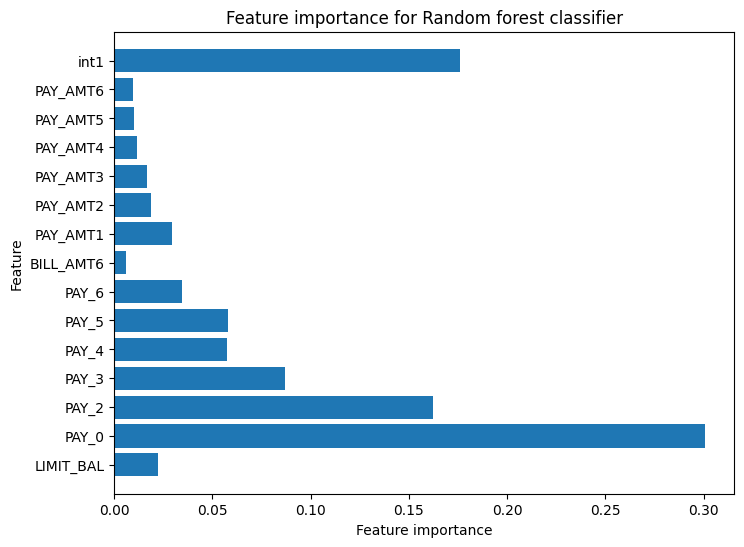

In [14]:
model = RandomForestClassifier(n_estimators=400,max_depth=40,max_leaf_nodes=20,verbose=0) #These parameters were decided after running GridSearchCV, however the same wasn't included to save on run time
model.fit(X_train,y_train)
yhat4 = model.predict(X_test)
print("The training accuracy is:\n ",classification_report(y_train,model.predict(X_train)))
print("The accuracy on the test data is:\n ",classification_report(y_test,yhat4))
pp.figure(figsize=(8,6))
pp.barh(range(len(X.columns)), model.feature_importances_, align='center') #Picking the feature importance of each variable and putting on bar graph
pp.yticks(np.arange(len(X.columns)),X.columns)
pp.xlabel("Feature importance")
pp.ylabel("Feature")
pp.title("Feature importance for Random forest classifier")
pp.ylim(-1, len(X.columns))

In [15]:
y_hat = yhat1 + yhat2 + yhat3 + yhat4 #Taking prediction on y_ test of all 4 previous models and adding together
y_hat = y_hat/4 #Taking average
y_final = []
for i in y_hat:
    if i > 0.5: #Majority vote
        y_final.append(1)
    else:
        y_final.append(0)
print("The accuracy for our combined model is:\n ",classification_report(y_test,y_final))

The accuracy for our combined model is:
                precision    recall  f1-score   support

           0       0.82      0.97      0.89      4659
           1       0.73      0.26      0.39      1341

    accuracy                           0.81      6000
   macro avg       0.77      0.62      0.64      6000
weighted avg       0.80      0.81      0.78      6000

